### Exercise 2

Suppose a factory produces light bulbs, with each light bulb independently having a probability $p=0.2$ of being defective. The factory tests $n=20$ light bulbs each day. 

---
**Preliminaries:** We first derive some general results that can be used in (2a) and (2b). 

Let $x$ be the random variable that counts the number of defective bulbs in a sample of $n$ test bulbs with success probability $p$ of detecting a defective bulb. Then $x$ follows a Binomial distribution $\text{Binomial}(n, p)$ with 

$$
\begin{align*}
\mathbb{E}[x] &= np \\
\mathbb{V}[x] &= np(1-p)
\end{align*}
$$


**Actual probability:** From $x \sim \text{Binomial}(n, p)$ follows

$$
\mathbb{P}(x \geq t) = \sum_{k=t}^{n} {n \choose k} p^k \cdot p^{n-k} 
$$


**Markov's inequality:** We have

$$
\mathbb{P}(x\geq t) \leq \frac{\mathbb{E}[x]}{t} = \frac{np}{t}.
$$
The expression $np/t$ is the Markov bound of $\mathbb{P}(x\geq t)$ as a function of $n$.


**Chebyshev's inequality:** Chebyshev's inequality states

$$
\mathbb{P}(|x - \mathbb{E}[x]| \geq \varepsilon) \leq \frac{\mathbb{V}[x]}{\varepsilon^2}.
$$

Instead of $\mathbb{P}(|x - \mathbb{E}[x]| \geq \varepsilon)$, we want to bound the probability $P(x \geq t)$ for some $t>0$ and as a function of $n$. For this, we express the event $\{x \geq t\}$ as 

$$
\{x \geq t\} 
= \{x - \mathbb{E}[x] \geq t - \mathbb{E}[x]\} 
\subseteq \{|x - \mathbb{E}[x]| \geq t - \mathbb{E}[x]\}.
$$

Let $\varepsilon = t - \mathbb{E}[x]$. Applying Chebyshev's inequality gives

$$
\begin{align*}
P(x \geq t) 
&\leq P(|x - \mathbb{E}[x]| \geq \varepsilon) 
&\leq \frac{\mathbb{V}[x]}{\varepsilon^2} 
&= \frac{np(1-p)}{(t - np)^2}.
\end{align*}
$$

The right hand side of the last equation is the Chebyshev bound for $P(X \geq t)$ as a function of $n$. 

**Note:** Chebyshev's inequality assumes that $\varepsilon>0$. Thus, the bound is undefined for $\varepsilon=t - \mathbb{E} \leq 0$. In this case, set the Chebyshev bound to $1$.

---
**(a)** Use Markov's and Chebyshev's inequalities to bound the probability that at least $16$ out of the $20$ tested light bulbs are defective. Compare both bounds to the actual probability of observing $16$ defective light bulbs. 

**Solution:** The random variable $x$ follows the Binomial distribution $\text{Binomial}(n=20, p=0.2)$. Thus, 

$$
\begin{align*}
\mathbb{E}[x] &= np = 20 \cdot 0.2 = 4 \\
\mathbb{V}[x] &= np(1-p) = 20 \cdot 0.2 \cdot 0.8 = 3.2
\end{align*}
$$

**Actual probability:** We have

$$
\mathbb{P}(x \geq 16) 
= \sum_{k=16}^{20} {20 \choose k} 0.2^k \cdot 0.8^{n-k} 
\approx 1.4\cdot 10^{-8}.
$$



**Markov's inequality:** We have 

$$
\mathbb{P}(x\geq 16) \leq \frac{\mathbb{E}[x]}{16} = \frac{4}{16} = 0.25.
$$


**Chebyshev's inequality:** We have

$$
\begin{align*}
\mathbb{P}(x \geq 16) 
&\leq \frac{\mathbb{V}[x]}{(t-\mathbb{E}[x])^2}\\
&= \frac{np(1-p)}{(t-np)^2}= \frac{3.2}{12^2} \approx 0.02.
\end{align*}
$$

**Comarison of bounds:** 

+ Probability : $1.4\times 10^{-8}$
+ Chebyshev's bound: $0.02$
+ Markov's bound: $0.25$


---
**(b)** Plot the bounds given by Markov's and Chebyshev's inequalities, as well as the actual probability that at least $16$ out of $n$ tested light bulbs are defective, as a function of the number $n$ of tested light bulbs.

**Note:** We use the formulas from the preliminaries with $p=0.2$ and $t=16$. 

**Program:**

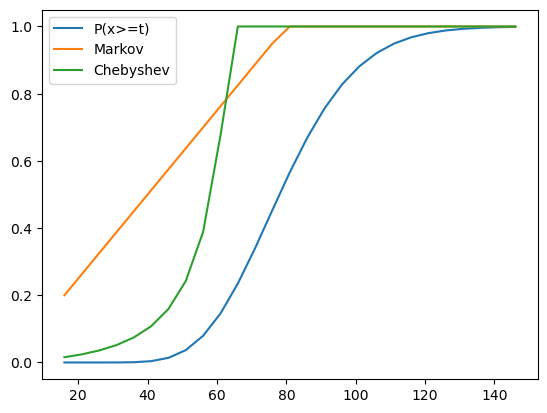

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

p = 0.2
t = 16
num = np.arange(t, 151, 5)
labels = ['P(x>=t)', 'Markov', 'Chebyshev']
eps = 1e-7

E = num * p
V = E * (1-p)

# actual prob and two bounds 
val = np.zeros((3, len(num)))

# val[0,:] : actual probability
k = np.arange(t, np.max(num)+1)
n = num[:, None]
val[0, :] = np.sum(binom.pmf(k, n, p), axis=1)

# val[1,:] : Markov's bound
val[1, :] = np.clip(E/t, 0, 1)

# val[2,:] : Chebyshev's bound
val[2, :] = np.where(E <= t, np.clip(V/(t-E+eps)**2, 0, 1), 1)

# plot
for i, l in enumerate(labels):
    plt.plot(num, val[i], label=l)
plt.legend()
plt.show()